In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel('Data_Train.xlsx')
df.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.shape


(10683, 11)

# checking if any null values

In [5]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
df.dropna(inplace=True)

# Exploratory Data Analysis
Categorical Data



In [7]:
def countplot(cat_features):
    ax=sns.countplot(x=df[cat_features],data=df,order=df[cat_features].value_counts().index)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    for rect in ax.patches:
        ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 10)

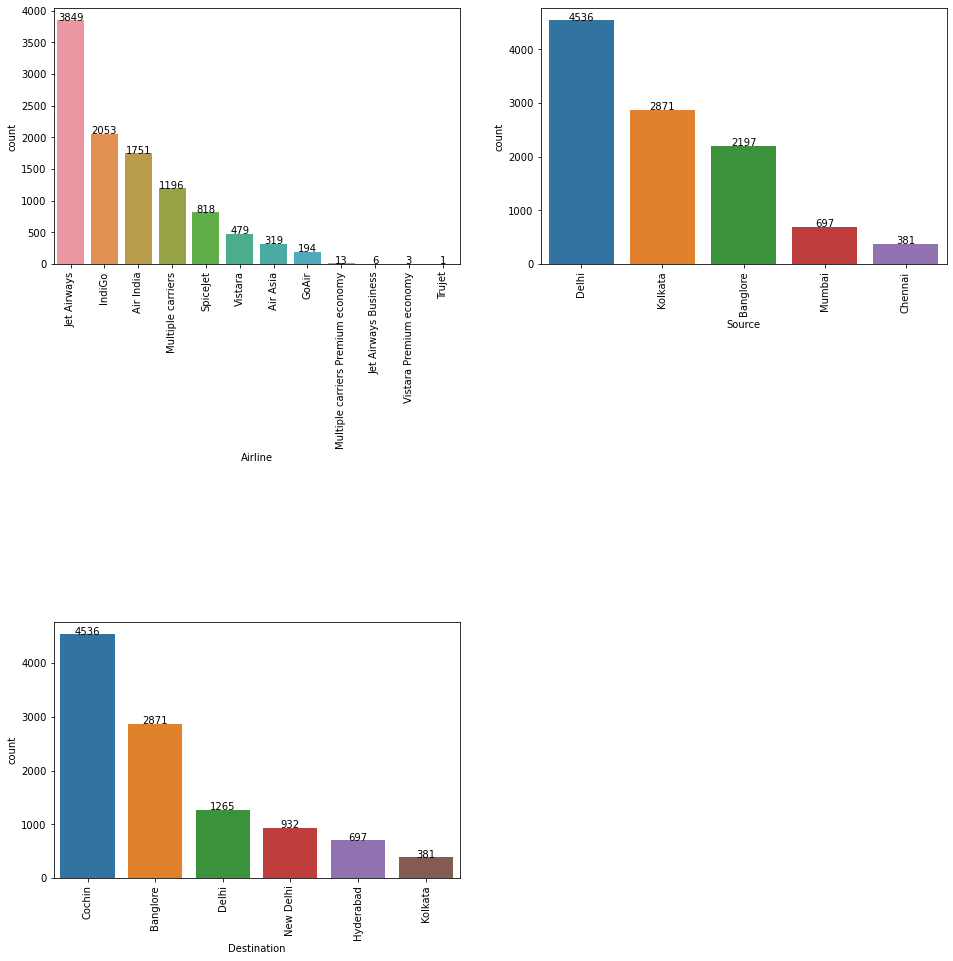

In [8]:
fig = plt.figure(1, (16, 16))
plt.subplot(3,2,1)
countplot('Airline')
plt.subplot(3,2,2)
countplot('Source')
plt.subplot(3,2,5)
countplot('Destination')

In [9]:
def countplot_hue(cat_features):
    ax=sns.countplot(x=cat_features,data=df,hue='Total_Stops')
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

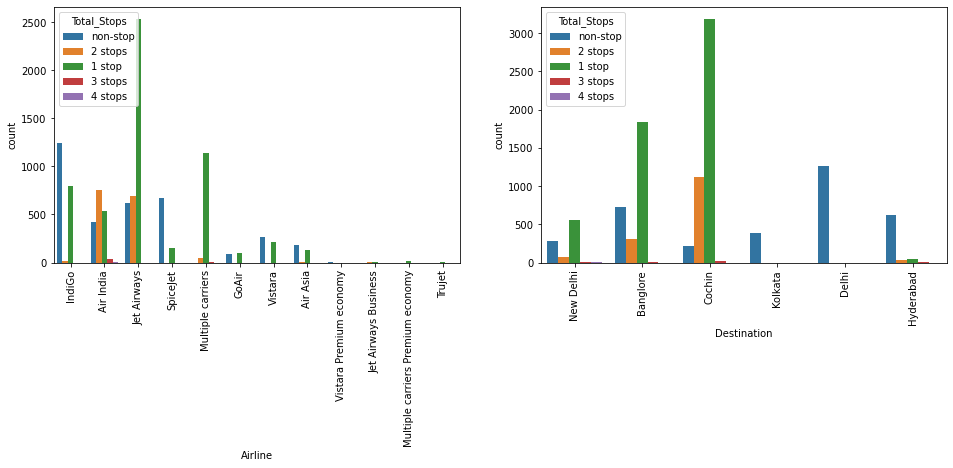

In [10]:
fig = plt.figure(1, (16, 16))
plt.subplot(3,2,1)
countplot_hue('Airline')
plt.subplot(3,2,2)
countplot_hue('Destination')

# Insights

1- most of the Jet Airways flights have 1 stop between source and destination

2- Indigo, Spicejet, Vistara and Air Asia have more flights with no stops rather than 1 stop.

3- Flights to cochin,banglore,new delhi generally have 1 stop inbetween.

4- Flights to Kolkata, Delhi have no stops in between.

<AxesSubplot:xlabel='Airline', ylabel='Price'>

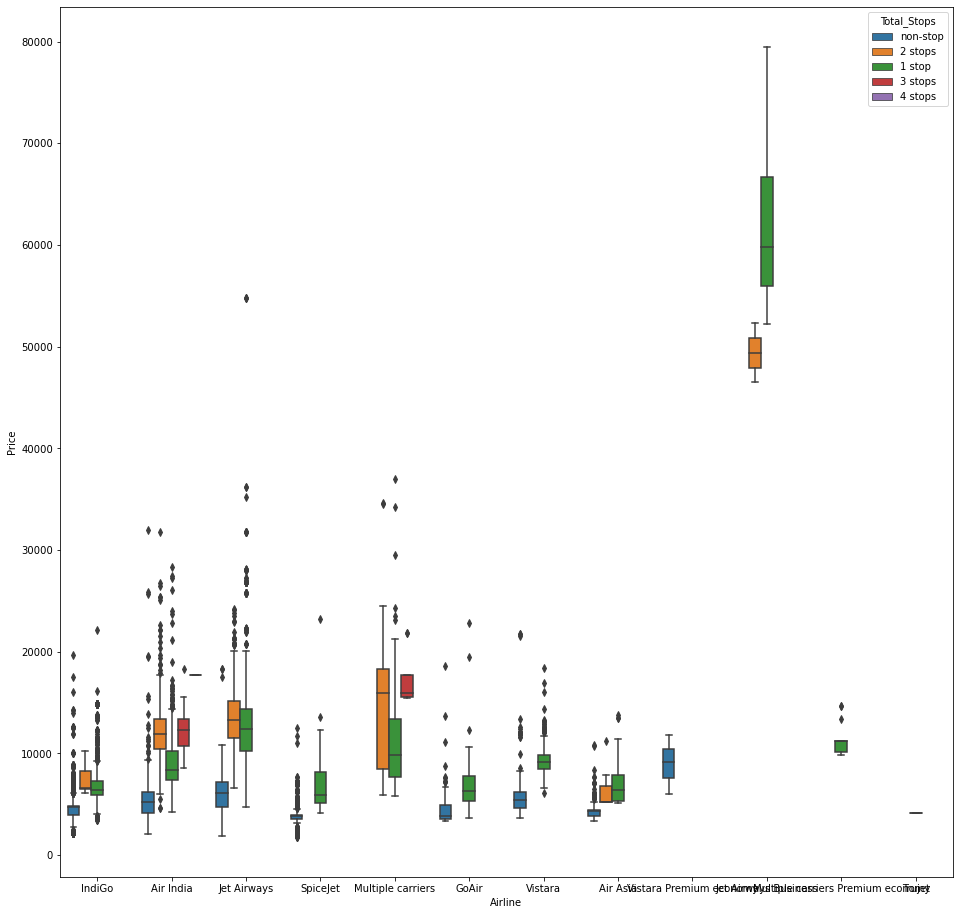

In [11]:

fig=plt.figure(1,(16,16))
sns.boxplot(x='Airline',y=df['Price'],data=df,hue='Total_Stops')

# Insights

1-Air India,Jet Airways ,Multiple carriers flights having 1-3 stops are the most expensive flights

2-IndiGo, Air Asia have the most cheapest flights with 1-3 stops.

<AxesSubplot:xlabel='Source', ylabel='Price'>

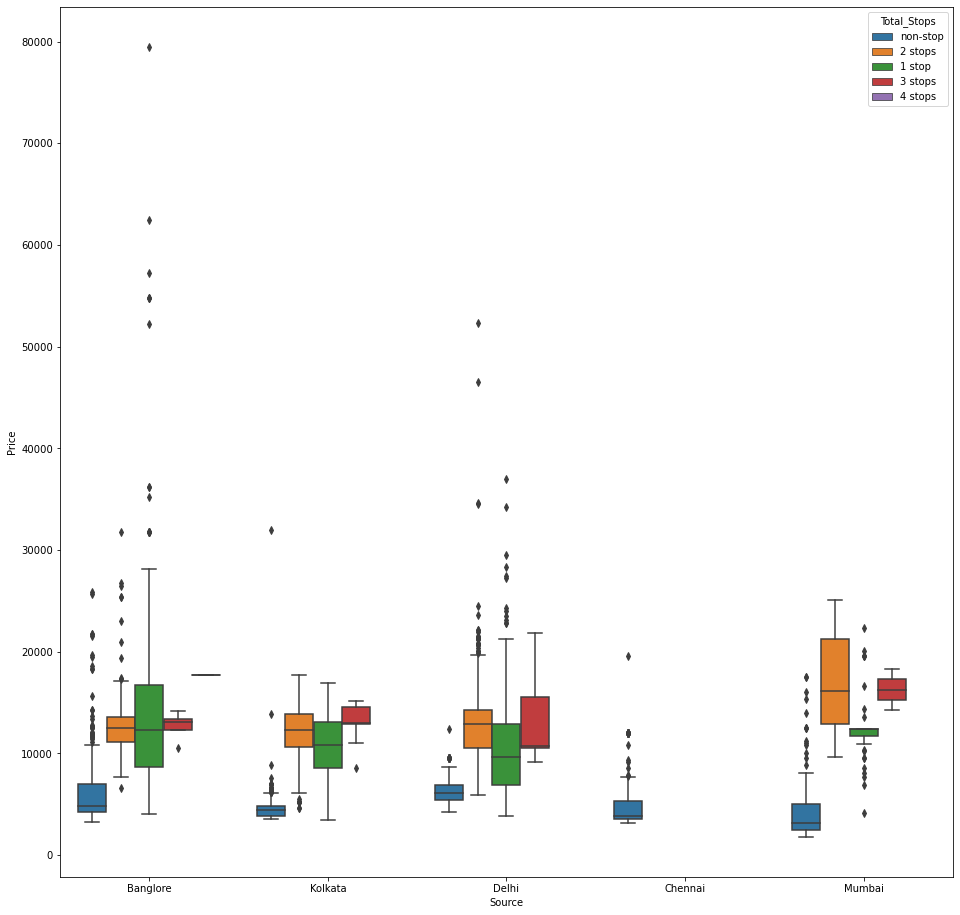

In [12]:
fig=plt.figure(1,(16,16))
sns.boxplot(x='Source',y=df['Price'],data=df,hue='Total_Stops')

# Insights

1- Two and Three stops Flights from Mumbai are the most expensive whereas only no stop flights fly from chennai

<AxesSubplot:xlabel='Destination', ylabel='Price'>

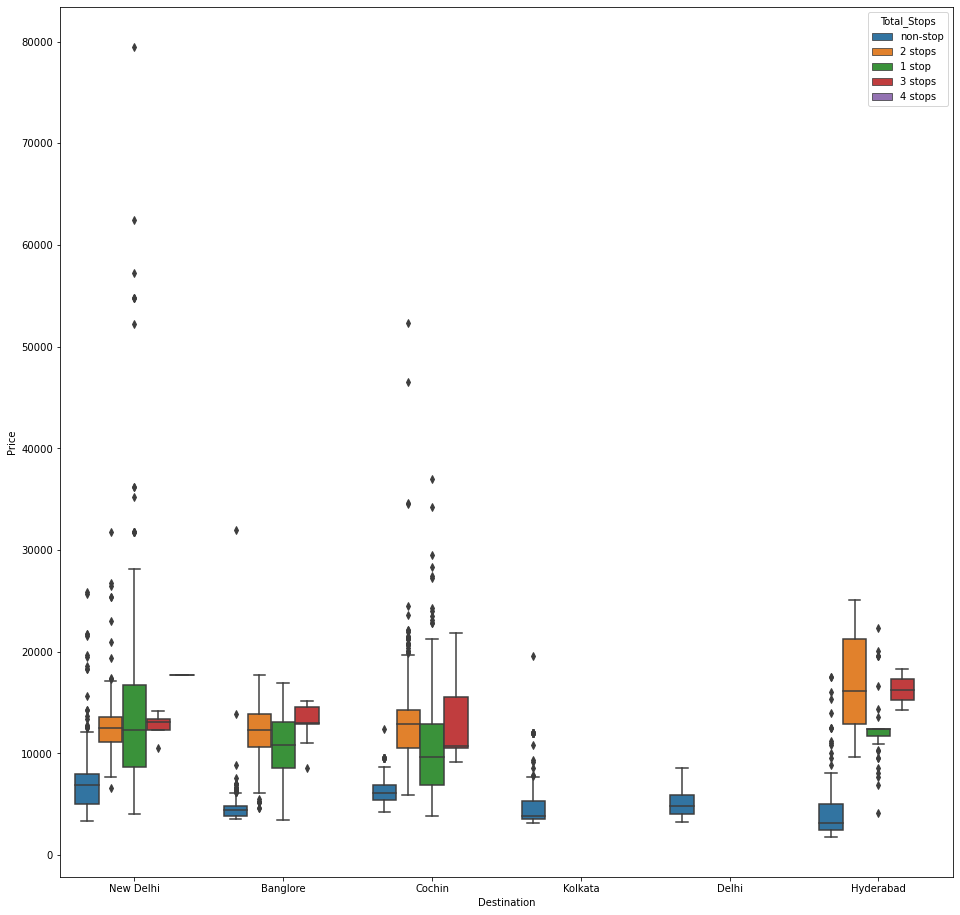

In [13]:
fig=plt.figure(1,(16,16))
sns.boxplot(x='Destination',y='Price',data=df,hue='Total_Stops')

# Insights

1- Two and three Stops flights to Hyderabad are the most expensive better option is no stop flights coz it is cheapest among all.

2-Only direct flights are present from Source to Kolkata and Delhi

# Date Time Data

In [14]:
season=df[['Date_of_Journey','Price']]

In [15]:
season["Month"]=pd.to_datetime(season['Date_of_Journey'],format="%d/%m/%Y").dt.month

In [16]:
season.drop(['Date_of_Journey'],axis=1,inplace=True)
season=season.set_index('Month')
season

,Price
Month,
3,3897
5,7662
6,13882
5,6218
3,13302
...,...
4,4107
4,4145
4,7229


<AxesSubplot:xlabel='Month', ylabel='Price'>

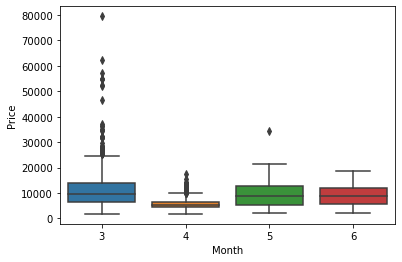

In [17]:
sns.boxplot(x=season.index,y='Price',data=season)

# Insights

1- Flight Fares in the month of april are little cheaper than other months

# Numerical Data

<AxesSubplot:xlabel='Price'>

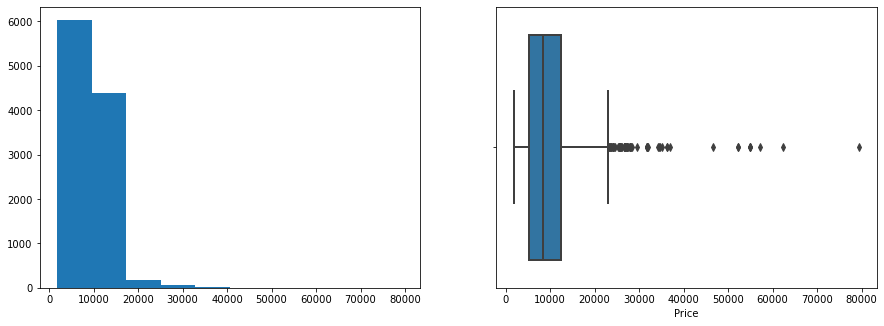

In [18]:
fig=plt.figure(1, (15, 30))
plt.subplot(5,2,1)
plt.hist(df['Price'])
plt.subplot(5,2,2)
sns.boxplot(x=df['Price'],orient='h',linewidth=2)